In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rc
from random import sample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.datasets import make_classification

In [8]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=90db861e64a1e630dbb569d02a704a91cf352eb65233a865773e7e9863da0115
  Stored in directory: c:\users\pereira\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install -U imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


#**S05 T01**#

##*Exercice 1*##

*Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.*

He escollit un dataset dels pilots que hi ha hagut en tota la història de la F1.

In [3]:
drivers = pd.read_csv(r'C:\Users\Pereira\Documents\IT Academy\S05T01\drivers.csv', sep = ',', encoding = 'utf-8')
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [5]:
drivers.drop(columns = ['url'], inplace=True)
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German


Fem una sample de manera random, escollint 50 pilots dels 854 que hi ha en total. Veiem que cada cop que implementem aquest codi, la sample varia ja que es genera de manera random. Li diem al codi quantes dades exactament ens ha de donar.

In [70]:
sample_drivers = drivers.sample(50)
sample_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality
590,590,lewis-evans,\N,\N,Stuart,Lewis-Evans,1930-04-20,British
52,53,kiesa,\N,\N,Nicolas,Kiesa,1978-03-03,Danish
454,454,ricardo_rodriguez,\N,\N,Ricardo,Rodríguez,1942-02-14,Mexican
757,757,peters,\N,\N,Josef,Peters,1914-09-16,German
789,789,martin,\N,\N,Eugène,Martin,1915-03-24,French
187,188,cecotto,\N,\N,Johnny,Cecotto,1956-01-25,Venezuelan
558,558,keller,\N,\N,Al,Keller,1920-04-11,American
197,198,villeneuve_sr,\N,\N,Jacques,Villeneuve Sr.,1953-11-04,Canadian
579,579,fangio,\N,\N,Juan,Fangio,1911-06-24,Argentine
139,140,johansson,\N,\N,Stefan,Johansson,1956-09-08,Swedish


Una altra manera de fer la random sample es dient-li diem al codi la fracció sobre el total de dades que ens ha de donar.

In [6]:
sample_drivers2 = drivers.sample(frac=0.2)
sample_drivers2

,driverId,driverRef,number,code,forename,surname,dob,nationality
824,825,kevin_magnussen,20,MAG,Kevin,Magnussen,1992-10-05,Danish
599,599,bisch,\N,\N,Art,Bisch,1926-11-10,American
817,818,vergne,25,VER,Jean-Éric,Vergne,1990-04-25,French
139,140,johansson,\N,\N,Stefan,Johansson,1956-09-08,Swedish
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British
...,...,...,...,...,...,...,...,...
543,543,cabianca,\N,\N,Giulio,Cabianca,1923-02-19,Italian
771,771,walt_brown,\N,\N,Walt,Brown,1911-12-30,American
561,561,ray_crawford,\N,\N,Ray,Crawford,1915-10-26,American
229,230,brambilla,\N,\N,Vittorio,Brambilla,1937-11-11,Italian


Sample sistemàtica. Li diem el primer índex de fila que agafem (el 2) i després el nº que fa de patró per agafar les següents dades (el 30). Així, comença pel 2, després li suma 30 (32), li suma 30 més (62) fins que no pot sumar més cops 30.

In [10]:
def systematic_sampling(drivers, step):
 
    indexes = np.arange(2, len(drivers), step=step)
    systematic_sample_drivers = drivers.iloc[indexes]
    return systematic_sample_drivers

systematic_sample_drivers = systematic_sampling(drivers, 30)

systematic_sample_drivers 

,driverId,driverRef,number,code,forename,surname,dob,nationality
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
32,33,monteiro,\N,TMO,Tiago,Monteiro,1976-07-24,Portuguese
62,63,salo,\N,\N,Mika,Salo,1966-11-30,Finnish
92,93,schiattarella,\N,\N,Domenico,Schiattarella,1967-11-17,Italian
122,123,boutsen,\N,\N,Thierry,Boutsen,1957-07-13,Belgian
152,153,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish
182,183,hesnault,\N,\N,François,Hesnault,1956-12-30,French
212,213,gabbiani,\N,\N,Beppe,Gabbiani,1957-01-02,Italian
242,243,stommelen,\N,\N,Rolf,Stommelen,1943-07-11,German
272,273,hoshino,\N,\N,Kazuyoshi,Hoshino,1947-07-01,Japanese


##*Exercice 2*##

*Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).*

Abans de fer la sample estratificada, analitzem la columna de nacionalitat, que serà la que utilitzem per a fer la sample. Veiem que hi ha 42 nacionalitats diferents i que la més repetida és la britànica.

In [14]:
drivers['nationality'].unique() 

array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Argentine', 'Czech',
       'Malaysian', 'Swiss', 'Belgian', 'Monegasque', 'Swedish',
       'Venezuelan', 'New Zealander', 'Chilean', 'Mexican',
       'South African', 'Liechtensteiner', 'Rhodesian',
       'American-Italian', 'Uruguayan', 'Argentine-Italian', 'Thai',
       'East German', 'Russian', 'Indonesian', 'Chinese'], dtype=object)

In [15]:
drivers['nationality'].nunique() 

42

In [16]:
drivers['nationality'].value_counts() 

British              165
American             157
Italian               99
French                73
German                50
Brazilian             32
Argentine             24
Belgian               23
Swiss                 23
South African         23
Japanese              20
Dutch                 17
Australian            17
Austrian              15
Spanish               15
Canadian              14
Swedish               10
Finnish                9
New Zealander          9
Mexican                6
Irish                  5
Danish                 5
Monegasque             4
Russian                4
Uruguayan              4
Portuguese             4
Rhodesian              4
East German            3
Venezuelan             3
Colombian              3
Indian                 2
Thai                   2
Indonesian             1
Argentine-Italian      1
Czech                  1
American-Italian       1
Liechtensteiner        1
Chilean                1
Malaysian              1
Hungarian              1


Fem la sample estratificada dient-li que ens agafi una fracció de 0'2. Així, la sample la fa proporcionalment segons els valors de cada fila.

In [7]:
drivers_by_nationality = pd.DataFrame(drivers.groupby('nationality', group_keys=False).apply(lambda x: x.sample(frac=0.2)))
drivers_by_nationality

,driverId,driverRef,number,code,forename,surname,dob,nationality
700,700,scarborough,\N,\N,Carl,Scarborough,1914-07-03,American
699,699,nalon,\N,\N,Duke,Nalon,1913-03-02,American
799,799,jackson,\N,\N,Jimmy,Jackson,1910-07-25,American
599,599,bisch,\N,\N,Art,Bisch,1926-11-10,American
574,574,constantine,\N,\N,George,Constantine,1918-02-22,American
...,...,...,...,...,...,...,...,...
66,67,buemi,\N,BUE,Sébastien,Buemi,1988-10-31,Swiss
780,780,branca,\N,\N,Toni,Branca,1916-09-15,Swiss
480,480,may,\N,\N,Michael,May,1934-08-18,Swiss
748,748,cantoni,\N,\N,Eitel,Cantoni,1906-10-04,Uruguayan


Tornem a analitzar la columna de nacionalitat i veiem que ara hi ha 30 nacionalitats enlloc de 42, i ens ha agafat una mostra proporcional de cadascuna. El 20% de 165 britànics és 33... 

In [8]:
drivers_by_nationality['nationality'].nunique() 

30

In [9]:
drivers_by_nationality['nationality'].value_counts() 

British          33
American         31
Italian          20
French           15
German           10
Brazilian         6
Belgian           5
Swiss             5
South African     5
Argentine         5
Japanese          4
Austrian          3
Australian        3
Canadian          3
Dutch             3
Spanish           3
New Zealander     2
Swedish           2
Finnish           2
Rhodesian         1
Uruguayan         1
Russian           1
Irish             1
Portuguese        1
Monegasque        1
Mexican           1
East German       1
Danish            1
Colombian         1
Venezuelan        1
Name: nationality, dtype: int64

Ara, preparem el dataset per poder fer l'SMOTE. Com que no tenim cap columna amb dades binàries, esborrem algunes dades de la columna de nacionalitat i ens quedem només amb britànics (que son els que més hi ha) i danesos (que només n'hi ha 5).

In [9]:
some_drivers = pd.DataFrame(drivers.drop(drivers[(drivers['nationality'] != "British") & (drivers['nationality'] != "Danish")].index))
some_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
13,14,coulthard,\N,COU,David,Coulthard,1971-03-27,British
17,18,button,22,BUT,Jenson,Button,1980-01-19,British
18,19,davidson,\N,DAV,Anthony,Davidson,1979-04-18,British
50,51,wilson,\N,\N,Justin,Wilson,1978-07-31,British
...,...,...,...,...,...,...,...,...
828,829,stevens,28,STE,Will,Stevens,1991-06-28,British
834,835,jolyon_palmer,30,PAL,Jolyon,Palmer,1991-01-20,British
844,846,norris,4,NOR,Lando,Norris,1999-11-13,British
845,847,russell,63,RUS,George,Russell,1998-02-15,British


In [71]:
some_drivers.dtypes

driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
dtype: object

Convertim la columna nacionalitat a numèric per poder fer l'SMOTE.

In [10]:
some_drivers["nationality"] = pd.to_numeric(some_drivers["nationality"], errors='coerce')

In [81]:
some_drivers.dtypes

driverId         int64
driverRef       object
number          object
code            object
forename        object
surname         object
dob             object
nationality    float64
dtype: object

Visualitzem gràficament la diferència entre britànics i danesos per veure que és una mostra imbalancejada.

C:\Users\Pereira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


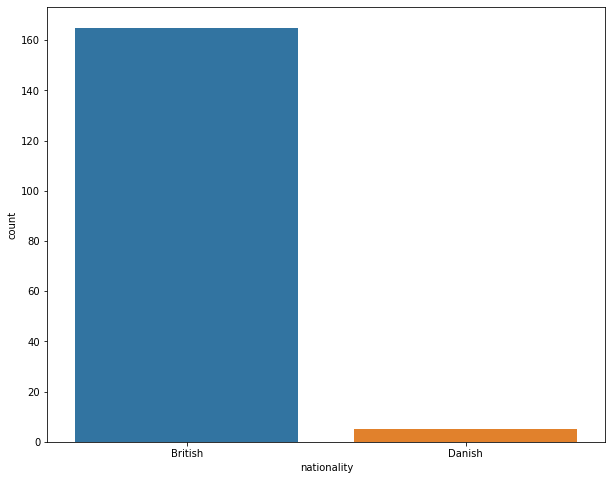

In [66]:
plt.figure(figsize = (10, 8))
sns.countplot(some_drivers['nationality'])
plt.show()

Fem l'SMOTE. Primer fem la classificació i li diem quantes files volem que agafi (li diem 170 que és el total), el nº de features i quantes son informatives, el nº de classes que en aquest cas és 2 i com volem fer la repartició dels pesos de cada classe.

In [18]:
X, y = make_classification(n_samples=170, n_features=5, n_informative=5, n_redundant=0, n_classes=2, weights=[0.2, 0.8], class_sep=0.95, random_state=0)

In [19]:
print("Feature Matrix: ");
print(pd.DataFrame(X,y, columns=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"]).head())

Feature Matrix: 
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
1   0.795549   1.547399   0.672187  -0.674702  -3.032377
1   2.372291   0.237436   0.618981  -1.851379   1.191163
1   3.220923  -0.604892  -3.204137  -2.497659  -1.948984
0   1.850152   1.511365  -1.206711   0.685709  -0.057573
1  -3.205535   0.486568   2.450461   0.631938   1.321081


Aquí podem veure com seria la gràfica de dispersió abans de fer l'SMOTE.

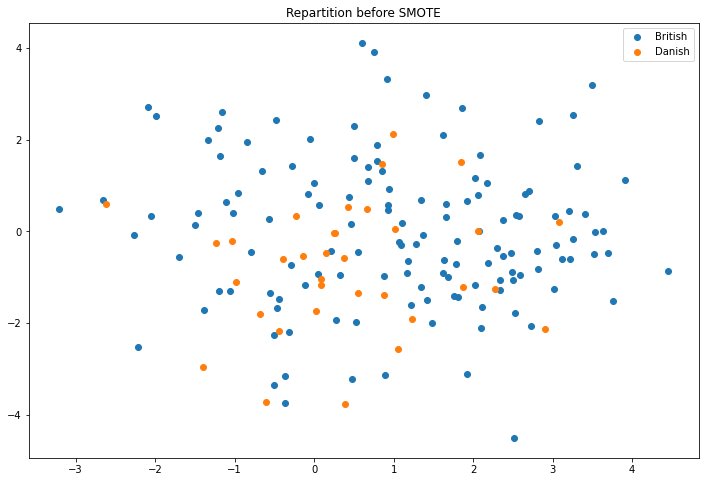

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Repartition before SMOTE')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='British')
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Danish')
plt.legend()
#plt.grid(False)
plt.show()

In [21]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)

Aquí veiem la gràfica de dispersió després de fer l'SMOTE.

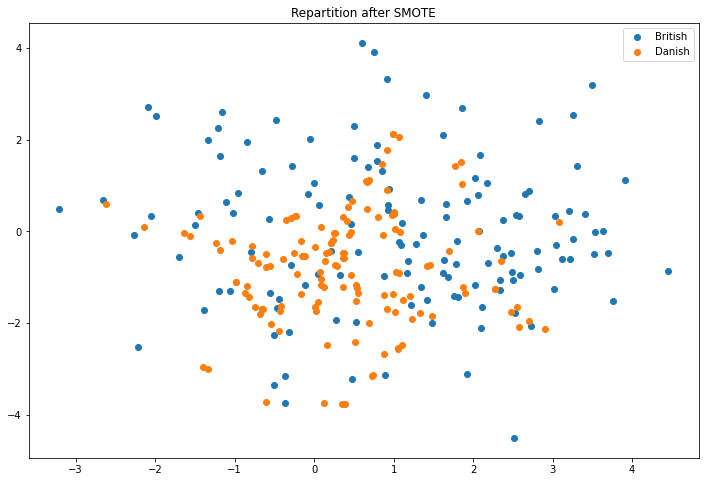

In [22]:
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')
plt.scatter(X_smote[y_smote==1][:, 0], X_smote[y_smote==1][:, 1], label='British')
plt.scatter(X_smote[y_smote==0][:, 0], X_smote[y_smote==0][:, 1], label='Danish')
plt.legend()
#plt.grid(False)
plt.show()

El dataset dels pilots de F1 per fer l'SMOTE no és el més ideal, per això he fet servir aquest altre dataset sobre malalties autoinmunes.

In [13]:
autoimmune = pd.read_csv(r'C:\Users\Pereira\Documents\IT Academy\S05T01\export.csv', sep = ',', encoding = 'utf-8')
autoimmune

C:\Users\Pereira\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
...,...,...,...,...,...,...,...,...,...
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN


Visualitzem gràficament les diferències entre sexes.

C:\Users\Pereira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


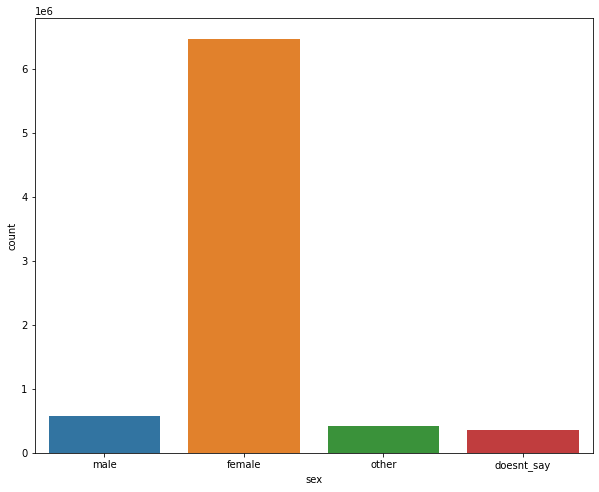

In [43]:
plt.figure(figsize = (10, 8))
sns.countplot(autoimmune['sex'])
plt.show()

In [44]:
autoimmune['sex'].value_counts() 

female        6478402
male           574907
other          428312
doesnt_say     362467
Name: sex, dtype: int64

In [63]:
autoimmune["sex"] = pd.to_numeric(autoimmune["sex"], errors='coerce')

In [64]:
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_classes=4, weights=[0.1, 0.3, 0.3, 0.3], class_sep=0.95, random_state=0)

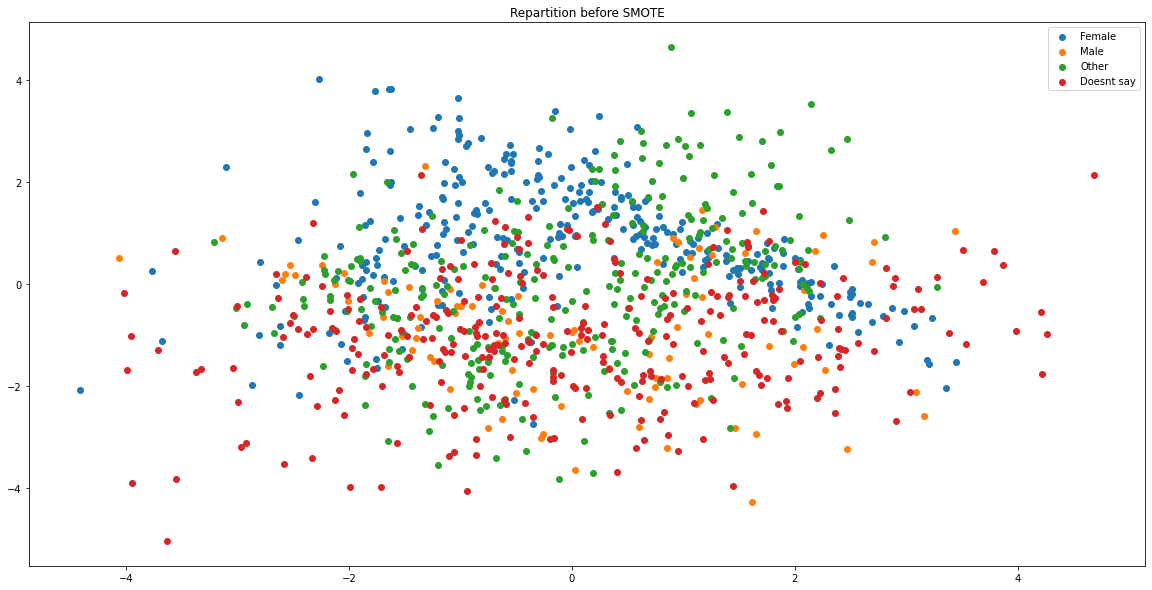

In [65]:
plt.figure(figsize=(20, 10))
plt.title('Repartition before SMOTE')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Female')
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Male')
plt.scatter(X[y==2][:, 0], X[y==2][:, 1], label='Other')
plt.scatter(X[y==3][:, 0], X[y==3][:, 1], label='Doesnt say')
plt.legend()
#plt.grid(False)
plt.show()

In [66]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)

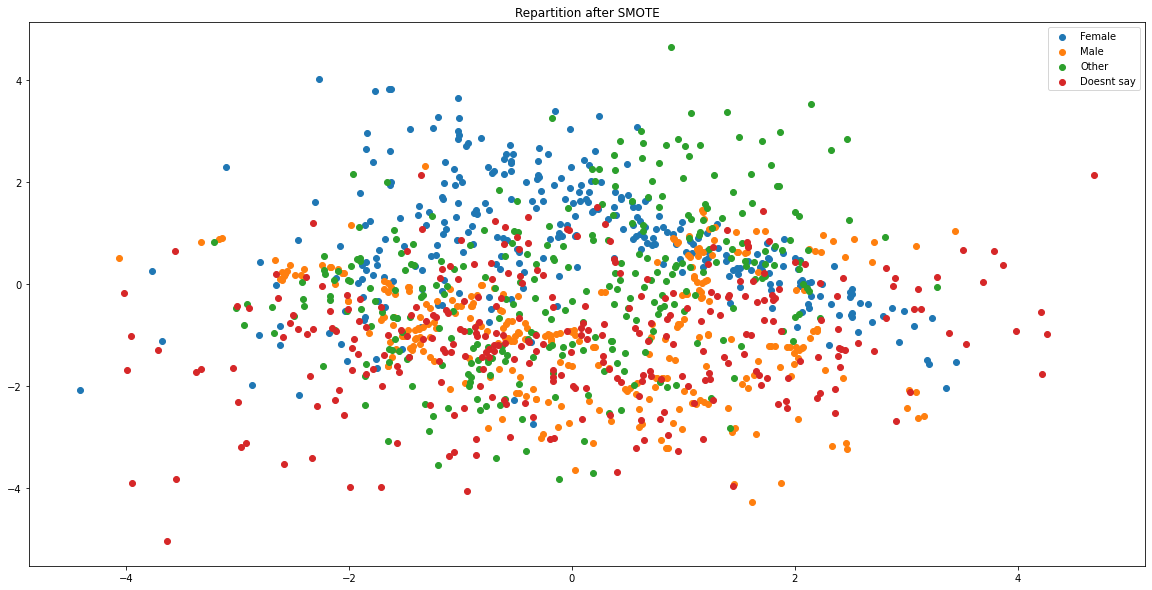

In [67]:
plt.figure(figsize=(20, 10))
plt.title('Repartition after SMOTE')
plt.scatter(X_smote[y_smote==1][:, 0], X_smote[y_smote==1][:, 1], label='Female')
plt.scatter(X_smote[y_smote==0][:, 0], X_smote[y_smote==0][:, 1], label='Male')
plt.scatter(X_smote[y_smote==2][:, 0], X_smote[y_smote==2][:, 1], label='Other')
plt.scatter(X_smote[y_smote==3][:, 0], X_smote[y_smote==3][:, 1], label='Doesnt say')
plt.legend()
#plt.grid(False)
plt.show()

Veiem les diferències entre les gràfiques abans i després de fer l'SMOTE.

##*Exercice 3*##

*Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.*

In [16]:
import random

Creem una sample amb un reservoir de mida k (amb valor = 99.0). Fem servir la columna d'edat per fer aquesta sample.

In [11]:
k = 100

res = np.full((k,1), -99.0)

res_df = pd.DataFrame(data=res,columns=['age'])
res_df

,age
0,-99.0
1,-99.0
2,-99.0
3,-99.0
4,-99.0
...,...
95,-99.0
96,-99.0
97,-99.0
98,-99.0


Afegim una columna anomenada 'i': index de l'item actualment considerat.

In [14]:
i_start = 1

file_nb_rows = autoimmune.shape[0]

col = np.arange(0,file_nb_rows)

col = col + i_start

autoimmune['i'] = col

print(autoimmune)

                                  user_id   age     sex country checkin_date  \
0        QEVuQwEABlEzkh7fsBBjEe26RyIVcg==   NaN     NaN     NaN   2015-11-26   
1        QEVuQwEAWRNGnuTRqXG2996KSkTIEw==  32.0    male      US   2015-11-26   
2        QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
3        QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
4        QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
...                                   ...   ...     ...     ...          ...   
7976218  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976219  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976220  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976221  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976222  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   

        trackable_id trackable_type  \


Afegim una nova columna anomenada 'j': l'algoritme aleshores genera un nº aleatori j entre (i incloent) 0 i i.

In [17]:
def myfunc(i):
        return random.randrange(0,i)

autoimmune['j'] = autoimmune['i'].apply(myfunc)

print(autoimmune)

                                  user_id   age     sex country checkin_date  \
0        QEVuQwEABlEzkh7fsBBjEe26RyIVcg==   NaN     NaN     NaN   2015-11-26   
1        QEVuQwEAWRNGnuTRqXG2996KSkTIEw==  32.0    male      US   2015-11-26   
2        QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
3        QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
4        QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
...                                   ...   ...     ...     ...          ...   
7976218  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976219  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976220  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976221  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   
7976222  QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==  22.0  female      GB   2019-12-04   

        trackable_id trackable_type  \


Seleccionem només les files on j < k.

In [18]:
autoimmune = autoimmune[ autoimmune['j'] < k ]

Fem que la columna j sigui l'index.

In [19]:
autoimmune = autoimmune.set_index('j')

Reemplacem les files del reservoir amb l'index corresponent del dataframe.

In [20]:
res_df.loc[autoimmune.index, :] = autoimmune[:]

print( res_df )

     age
0   31.0
1   28.0
2   47.0
3   37.0
4   45.0
..   ...
95  34.0
96  26.0
97  22.0
98  25.0
99  44.0

[100 rows x 1 columns]


Actualitzem i_start.

In [21]:
i_start += file_nb_rows

Hem fet una sample de 100 files per edat on totes les files han tingut la mateixa probabilitat de ser escollides.